# Objetivos deste trabalho:
- Se familiarizar com o ambiente Notebook e com Python
- Implementar um perceptron simples, treiná-lo no conjunto de TREINO do CIFAR-10 e avaliá-lo no conjunto de TESTE (alvo: distinguir fotos de animais de meios de transporte)
- Utilizar a função sigmóide e verificar seu efeito no treinamento e na avaliação
- Modificar a metodologia para classificar cada classe individualmente (i.e. treinar 10 perceptrons, um para cada classe). Considerar: dado um exemplo, que passará por cada perceptron, como decidir qual é a classe dele?

In [1]:
from __future__ import division

%matplotlib inline

import torch
import torchvision
import numpy as np

np.seterr(all='raise')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [2]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

0it [00:00, ?it/s]

170500096it [00:09, 17839593.87it/s]                               


Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [0]:
# Converter para tons de cinza

# Treino
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append((gray_npimg,category))
    
# Teste
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append((gray_npimg,category))    

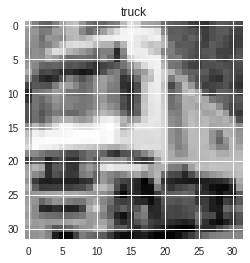

In [6]:
# Mostrar uma imagem

import matplotlib.pyplot as plt
import numpy as np

image_index = 1
label = grayscale_dataset_train[image_index][1]
npimg = grayscale_dataset_train[image_index][0]

plt.imshow(npimg, cmap='gray')
plt.title(label)
plt.show()

In [0]:
# Converter para vetores 1D

# Para pensar: por que a divisão por 255 no código abaixo?

# A divisão por 255 (maior valor possível que cada pixel em tom de cinza alcança)
# ocorre para "normalizar os valores". Valores muito altos poderiam causar problemas
# à rede, ou até erros de overflow  nas iterações iniciais, além de exigir que os pesos
# dos perceptrons sejam extremamente precisos em pequena escala, podendo impedir a
# melhoria do modelo por falta de capacidade de representação

linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))   
    


In [8]:
size = len(linear_dataset_train[0][0])
print(size)

1024


# Definindo o perceptron

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def perceptron(inputs, weights):
    o = inputs.dot(weights)
    return o

# Treinando o perceptron

In [0]:
def sigmoid_dx(x):
    y = sigmoid(x)
    return y*(1-y)

def Quantizer(x, threshold=0.5):
    if x > threshold:
        return 1
    return 0
  
def err(target, pred):
    return target - pred

def evaluate(weights, dataset):
    # Defina a métrica de avaliação do perceptron aqui (e.g. acurácia)
    mse,tp,tn,fp,fn = 0,0,0,0,0
    for img,label in dataset:
        inputs = np.append(img, [1])
        o = perceptron(inputs, weights)
        y = sigmoid(o)
        
        mse += (label-y)**2
        result = Quantizer(y)
       
        if result == 1:
            if label == 1: tp+=1
            else: fp+=1
        else: 
            if label == 1: fn+=1
            else: tn+=1        

    return {
        "Accuracy": (tp+tn)/len(dataset),
        "Sensibility": tp/(tp+fn),
        "Specifics": tn/(tn+fp),
        "MSE": mse/len(dataset)
    }

In [11]:
# Inicialização
weights = (np.random.rand(1,size) - 0.5)[0]
bias = (np.random.rand(1) - 0.5) 
weights = np.append(weights, bias) 

neta = 0.0015

np.random.shuffle(linear_dataset_train)

# Implemente o treino aqui (para separar as duas classes definidas)

accuracies = []

for epoch in range(100):  
    for img, label in linear_dataset_train:
        inputs = np.append(img, [1])
        o = perceptron(inputs, weights)
        y = sigmoid(o)
        loss = neta * inputs * err(label, y) * sigmoid_dx(o)
        weights += loss
        
    results = evaluate(weights, linear_dataset_train)
    accuracies.append(results["Accuracy"])
    print("Epoch ", epoch, ": ", results["Accuracy"])
    
print("Binary Training: ", results)
    

Epoch  0 :  0.6874
Epoch  1 :  0.69742
Epoch  2 :  0.70306
Epoch  3 :  0.707
Epoch  4 :  0.70896
Epoch  5 :  0.71208
Epoch  6 :  0.71396
Epoch  7 :  0.71562
Epoch  8 :  0.71668
Epoch  9 :  0.71792
Epoch  10 :  0.71862
Epoch  11 :  0.71932
Epoch  12 :  0.71996
Epoch  13 :  0.72024
Epoch  14 :  0.72048
Epoch  15 :  0.72106
Epoch  16 :  0.7221
Epoch  17 :  0.72228
Epoch  18 :  0.72234
Epoch  19 :  0.7232
Epoch  20 :  0.72364
Epoch  21 :  0.72376
Epoch  22 :  0.72404
Epoch  23 :  0.72466
Epoch  24 :  0.72502
Epoch  25 :  0.72556
Epoch  26 :  0.72588
Epoch  27 :  0.72634
Epoch  28 :  0.7264
Epoch  29 :  0.72652
Epoch  30 :  0.7271
Epoch  31 :  0.7272
Epoch  32 :  0.72736
Epoch  33 :  0.72742
Epoch  34 :  0.72776
Epoch  35 :  0.728
Epoch  36 :  0.7283
Epoch  37 :  0.72846
Epoch  38 :  0.72868
Epoch  39 :  0.72866
Epoch  40 :  0.7286
Epoch  41 :  0.7289
Epoch  42 :  0.729
Epoch  43 :  0.72914
Epoch  44 :  0.72932
Epoch  45 :  0.72948
Epoch  46 :  0.72968
Epoch  47 :  0.72966
Epoch  48 :  0.72

In [12]:
# Avalie o modelo treinado aqui
# Como a acurácia no conjunto de teste se compara com a acurácia obtida no conjunto de treino?
train_results = evaluate(weights, linear_dataset_train)
print("Train Data Accuracy", train_results)
test_results = evaluate(weights, linear_dataset_test)
print("Test Data Accuracy", test_results)

Train Data Accuracy {'Accuracy': 0.73168, 'Sensibility': 0.60795, 'Specifics': 0.8141666666666667, 'MSE': 0.1851628588548583}
Test Data Accuracy {'Accuracy': 0.7243, 'Sensibility': 0.603, 'Specifics': 0.8051666666666667, 'MSE': 0.19132895556922502}


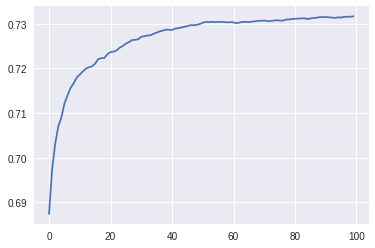

In [13]:
# Caso queiram plotar alguma coisa

import matplotlib.pyplot as plt

plt.plot(accuracies)

# Classificando classes individuais

Implemente aqui a modificação do processo de avaliação e treinamento para poder classificar cada classe individualmente.

- Ideia geral: treinar um perceptron por classe (exemplo positivo = exemplos da classe; exemplos negativos = exemplo de todas outras classes)
- Dado um exemplo qualquer, como decidir qual perceptron está dando a classe correta?

In [0]:
def individual_dataset(target_labels):
  linear_dataset_train = []
  for img,category in grayscale_dataset_train:
      linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
      if category in target_labels:
          label = 1
      else:
          label = 0
      linear_dataset_train.append((linear_img,label))


  linear_dataset_test = []
  for img,category in grayscale_dataset_test:
      linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
      if category in target_labels:
          label = 1
      else:
          label = 0
      linear_dataset_test.append((linear_img,label))    

  return linear_dataset_train, linear_dataset_test

In [15]:
modelos = []
for target_label in classes:
  
    linear_dataset_train, linear_dataset_test = individual_dataset(target_label)
    
    weights = (np.random.rand(1,size) - 0.5)[0]
    bias = (np.random.rand(1) - 0.5) 
    weights = np.append(weights, bias) 
    
    neta = 0.0015
    
    np.random.shuffle(linear_dataset_train)

    print("Training", target_label + "...")

    for epoch in range(100):        
        for img, label in linear_dataset_train:
            inputs = np.append(img, [1])
            o = perceptron(inputs, weights)
            y = sigmoid(o)
            loss = neta * inputs * err(label, y) * sigmoid_dx(o)
            weights += loss

        train_results = evaluate(weights, linear_dataset_train) 
        acc = train_results['Accuracy']
    
    
    test_results = evaluate(weights, linear_dataset_test)
    acc_test = test_results['Accuracy']
    modelos.append(
       {
        "Weights": weights,
        "Accu": acc,
        "T_Accu": acc_test,
        "Label": target_label
      }
    )
    print("Accuracy train: ", acc)
    print("Accuracy test: ", acc_test)
    

Training plane...
Accuracy train:  0.90226
Accuracy test:  0.9018
Training car...
Accuracy train:  0.90772
Accuracy test:  0.9037
Training bird...
Accuracy train:  0.89994
Accuracy test:  0.8995
Training cat...
Accuracy train:  0.90012
Accuracy test:  0.8997
Training deer...
Accuracy train:  0.89982
Accuracy test:  0.8999
Training dog...
Accuracy train:  0.9039
Accuracy test:  0.9041
Training frog...
Accuracy train:  0.90014
Accuracy test:  0.8994
Training horse...
Accuracy train:  0.90644
Accuracy test:  0.9026
Training ship...
Accuracy train:  0.89936
Accuracy test:  0.8979
Training truck...
Accuracy train:  0.9
Accuracy test:  0.9


In [16]:
corrects = 0
for img,category in grayscale_dataset_test:
    linear_img = np.append((img.reshape(img.shape[0]*img.shape[1],1) / 255), [1])
    
    results = []
    for modelo in modelos:
        o = perceptron(modelo['Weights'], linear_img)
        pred = sigmoid(o)
        results.append((pred, modelo['Label']))
    results = sorted(results, reverse=True)

    if results[0][1] == category:
        corrects += 1

print("General Test with all classes, Acc = ", corrects / len(grayscale_dataset_test))

General Test with all classes, Acc =  0.269
